# Histogram equalization

First it shows the histogram, and the cumulative histogram of the original image. The iamge is converted to grayscale, and color values are represented in the [0,1] range. Next the equalization is applied, and the histogram and the cumulative histogram are plotted of the modified image. The equalized image has more contrast.

In [31]:
import numpy as np
import matplotlib.pyplot as plt


### Original image

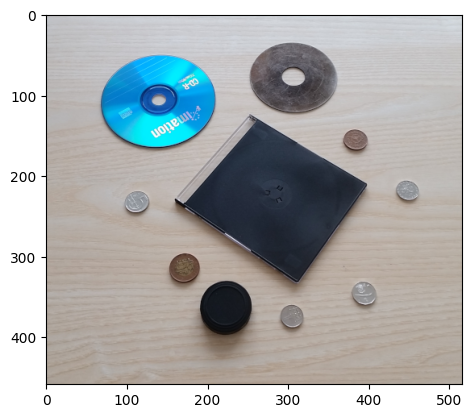

In [32]:
image=plt.imread(".\Data\cd_box.png")
plt.imshow(image)


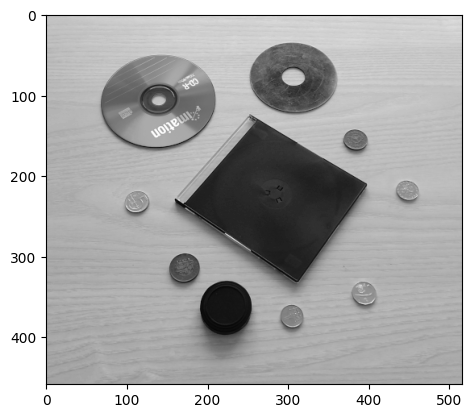

In [33]:

img_gray = image[:,:,0] * 0.2989 + image[:,:,1] * 0.5870 + image[:,:,2] * 0.1140   
plt.imshow(img_gray,cmap="gray")


### Methods for obtaining histogram data

In [34]:
def convert_to_grayscale(img:np.array)->np.array:
    if len(img.shape)==3:
        img = img[:,:,0] * 0.2989 + img[:,:,1] * 0.5870 + img[:,:,2] * 0.1140 
    return img

def histogram(array:np.array,bins:int)->np.array:
    histogram=np.zeros(bins)
    grayscale_img=convert_to_grayscale(array)
    for row in grayscale_img:
        for px in row:
           index=int((bins-1)*px)
           histogram[index]+=1 
    return histogram

def cumulative_histogram(array:np.array)->np.array:
    num_bins=array.shape[0]
    hist=np.zeros(num_bins)
    
    for index in range(num_bins):
        hist[index]=hist[index-1]+array[index]

    hist=hist/hist[-1]
    return  hist

Text(0.5, 1.0, 'The histogram of the original image with 256 bins')

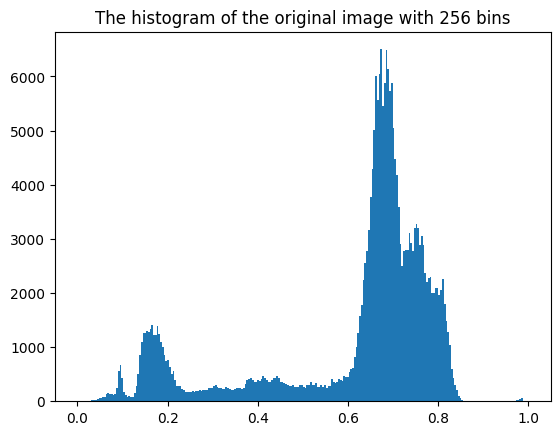

In [35]:
num_bins=256
original_histogram=histogram(image,num_bins)
plt.hist(np.linspace(0,1,num_bins),bins=num_bins,weights=original_histogram)
plt.title("The histogram of the original image with 256 bins")

Text(0.5, 1.0, 'The cumulative histogram of the original image')

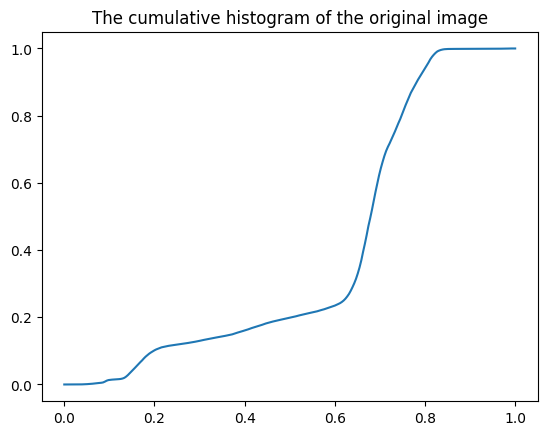

In [36]:
cum_hist=cumulative_histogram(original_histogram)
plt.plot(np.linspace(0,1,len(cum_hist)),cum_hist)
plt.title("The cumulative histogram of the original image")


### Equalizer algorithm and results

The equalization algorithm takes the cumulative histogram of the image, and the original image. It swaps all the original values of the image with the corresponding value on the cumulative histogram. It results in a close to linear cumulative histogram.

In [37]:
def equalize_histogram(img:np.array,cumulative_histogram:np.array)->np.array:
    width,height=img.shape[0],img.shape[1]
    equalized_img=np.zeros(img.shape)
    for w in range(width):
        for h in range(height):
            index=int(img[w][h]*256)
            swap_value=cumulative_histogram[index]
            equalized_img[w][h]=swap_value
    return equalized_img

In [38]:
equalized_image=equalize_histogram(img_gray,cum_hist)

Text(0.5, 1.0, 'The equalized image')

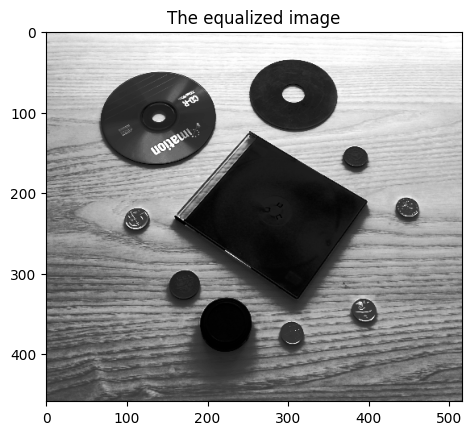

In [39]:
plt.imshow(equalized_image,cmap="gray")
plt.title("The equalized image")

In [40]:
reshaped_image=np.reshape(equalized_image,equalized_image.shape[0]*equalized_image.shape[1])
max(reshaped_image)

1.0

Text(0.5, 1.0, 'The histogram of the equalized image')

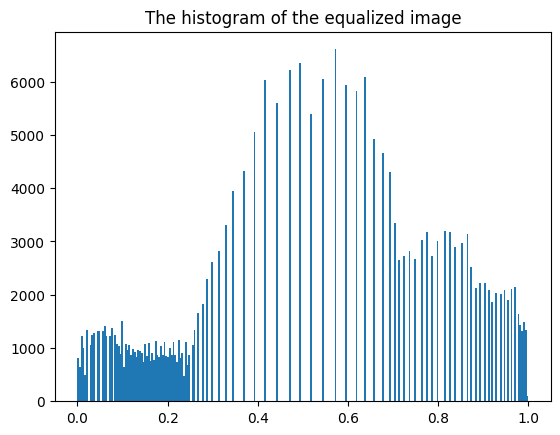

In [41]:
equalized_hist=histogram(equalized_image,num_bins)
plt.hist(np.linspace(0,1,num_bins),bins=num_bins,weights=equalized_hist)
plt.title("The histogram of the equalized image")

Text(0.5, 1.0, 'The cumulative histogram of the equalized image')

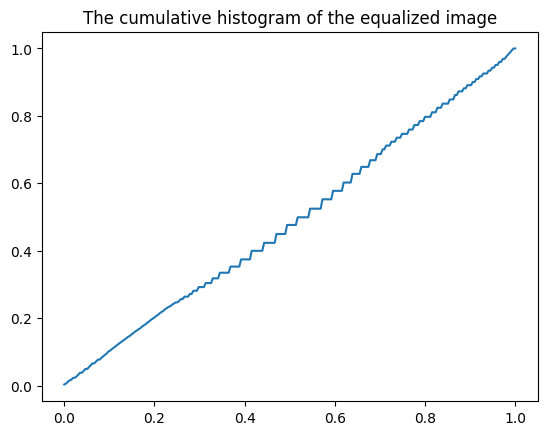

In [42]:
equalized_cumulative_hist=cumulative_histogram(equalized_hist)
plt.plot(np.linspace(0,1,equalized_cumulative_hist.shape[0]),equalized_cumulative_hist)
plt.title("The cumulative histogram of the equalized image")